# Edges detection (Sobel, Canny, and Huogh)

### Task 0: Reprenseting Figures

In [2]:
#Matplotlib is a useful plotting library for python
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import cv2 

# This code is to make matplotlib figures appear inline in the notebook rather than in a new window.
%matplotlib inline

# set default size of plots
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In this part, you will load some images and do some operations on them. At the end of this part, please create a new python file `imageMain.py` and copy all of your implemented functions in that file to use them in your future assignments and project. In your submission, include this updated notebook, a PDF of this notebook, and imageMain.py.

In [3]:
def displayImage(img):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
def readImage(imagePath):
    # Your code here
    return mpimg.imread(imagePath)

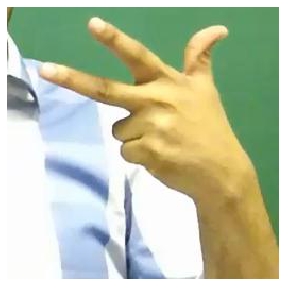

(256, 256, 3)


In [4]:
image = readImage("hand.jpg")

displayImage(image)

print(image.shape)

## Question 1 (20 points)
Apply Sobel operators to find the edges of the “hand.jpg “ image. 

1. Find and show the horizontal and vertical gradients of the image
2. Find and show the gradient magnitude
3. Find and show the gradient directions
4. Analyze the results.


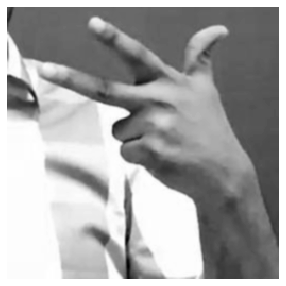

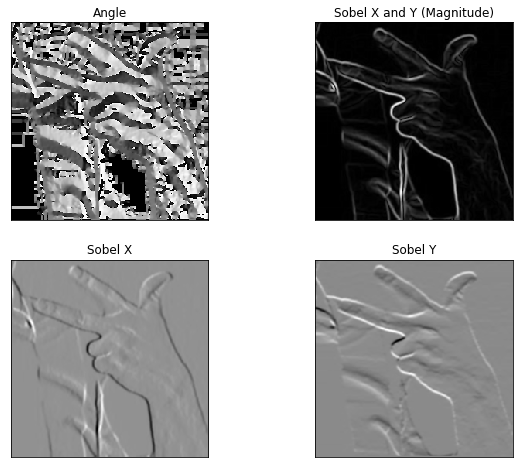

In [15]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(gray,(3,3),0)
displayImage(img)

sobelx_8u = cv2.Sobel(img,cv2.cv2.CV_32F,1,0,ksize=5)  # x
sobely_8u = cv2.Sobel(img,cv2.cv2.CV_32F,0,1,ksize=5)  # y
sobelxy_8u = cv2.Sobel(img,cv2.cv2.CV_32F,1,1,ksize=5)  # xy
mag, ang = cv2.cartToPolar(sobelx_8u, sobely_8u)



plt.subplot(2,2,1),plt.imshow(ang)
plt.title('Angle'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(mag)
plt.title('Sobel X and Y (Magnitude)'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx_8u)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely_8u)
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

### Analysis
sobel filter results usually have poor localization (multiple adjacent pixels) 

## Question 2 (20 points)
Apply Canny detector to “hand.jpg” image and compare the results with Sobel operator.

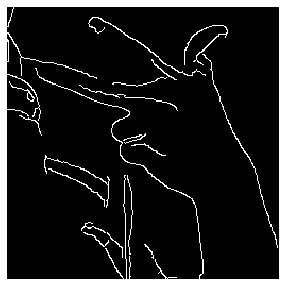

In [6]:
# Your code here
edges = cv2.Canny(image=img, threshold1=75, threshold2=200) # Canny Edge Detection
displayImage(edges)

The Canny technique produces smoother edges (than Sobel) due to the implementation of Non-maxima suppression and thresholding.

## Question 3 (30 points)
Apply Hough transform to detect the center and radius of all eye irises found in 'eyes.zip' images. You need also to display and draw the detected irises on the original images.

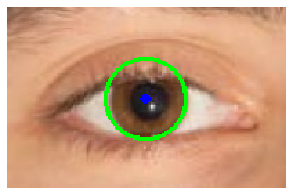

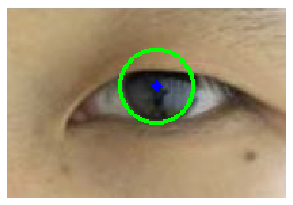

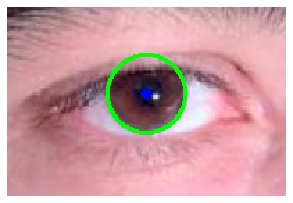

In [8]:
# Write your code here
def eyeIrisDetector(imagePath):

  # Read image 
  image = readImage(imagePath)

  # Convert to gray-scale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Blur the image to reduce noise
  img_blur = cv2.medianBlur(gray, 5)

  # Apply hough transform on the image
  circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=10, maxRadius=45)

  # Draw detected circle
  if circles is not None:
      circles = np.uint16(np.around(circles))
      for i in circles[0, :1]:
          # Draw outer circle
          cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 2)
          # Draw inner circle
          cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)

  displayImage(image)

eyeIrisDetector('eye01.jpg')  
eyeIrisDetector('eye02.jpg') 
eyeIrisDetector('eye03.jpg') 
